In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pysis.isis import ciss2isis, cisscal, spiceinit, ringscam2map
from pysis.util import file_variations

In [3]:
%matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['image.cmap'] = 'gray'

Using matplotlib backend: MacOSX


In [4]:
cd ~/data/ciss/PDSdata_miodrak_list/

/Users/klay6683/data/ciss/PDSdata_miodrak_list


In [5]:
file_variations('N1467351539_2_CALIB.IMG', ['.cub', '.cal.cub'])

['N1467351539_2_CALIB.cub', 'N1467351539_2_CALIB.cal.cub']

In [6]:
fnames = !ls *.LBL
fnames

['N1540679399_1.LBL']

In [7]:
import os
from os.path import join as pjoin
ISISDATA = os.environ['ISIS3DATA']

def calibrate_ciss(img_name, name_only=False):
    (cub_name, cal_name, map_name) = file_variations(img_name, ['.cub', '.cal.cub',
                                                                '.map.cal.cub'])
    if name_only:
        return map_name
    ciss2isis(from_=img_name, to=cub_name)
    spiceinit(from_=cub_name, cksmithed='yes', spksmithed='yes',
              shape='ringplane')
    cisscal(from_=cub_name, to=cal_name)
    ringscam2map(from_=cal_name, to=map_name,
                 map=pjoin(ISISDATA,
                           'base/templates/maps/ringcylindrical.map'))
    return map_name

In [8]:
map_name = calibrate_ciss(fnames[0], name_only=True)

In [55]:
import gdal
import numpy as np
ds = gdal.Open(map_name)
data = ds.ReadAsArray()
data[data < -2e+38] = np.nan
mean_value = np.nanmean(data, axis=1)

In [10]:
plt.imshow(data)
plt.grid()

In [12]:
plt.plot(mean_value)

In [13]:
plt.plot(data[:,500])

In [56]:
subtracted = data - mean_value[:, np.newaxis]

In [16]:
plt.plot(subtracted[:, 500])

In [17]:
np.nanmin(subtracted)

-0.0099897459

In [18]:
np.nanmax(subtracted)

0.052041203

In [20]:
min_ = np.nanmin(subtracted)
max_ = np.nanmax(subtracted)
plt.hist(subtracted.ravel(), bins=100, range=(min_, max_), log=True);

In [41]:
plt.figure()
plt.imshow(subtracted[50:-50,50:-50], vmin=-0.0005, vmax=0.0005, cmap='gray')

In [42]:
from skimage.exposure import equalize_hist

In [59]:
subtracted[np.isnan(subtracted)] = -1

In [60]:
eq = equalize_hist(subtracted)

In [61]:
plt.figure()
plt.imshow(eq)

In [48]:
equalize_hist?

In [89]:
from IPython.html.widgets import interactive, interact, fixed
from IPython.display import display
from skimage import data, filter, io

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [93]:
interpolators = ['none', 'nearest', 'bilinear', 'bicubic',
    'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
    'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc',
    'lanczos']
def myimshow(img, vmin, vmax, i):
    fig, ax = plt.subplots()
    ax.imshow(img, vmin=vmin, vmax=vmax, aspect='auto',
              interpolation=interpolators[i])
    ax.set_title('vmin: {:.2f}, vmax: {:.2f}, interpolator:{}'.format(vmin,vmax,
                                                                     interpolators[i]))
    plt.show()

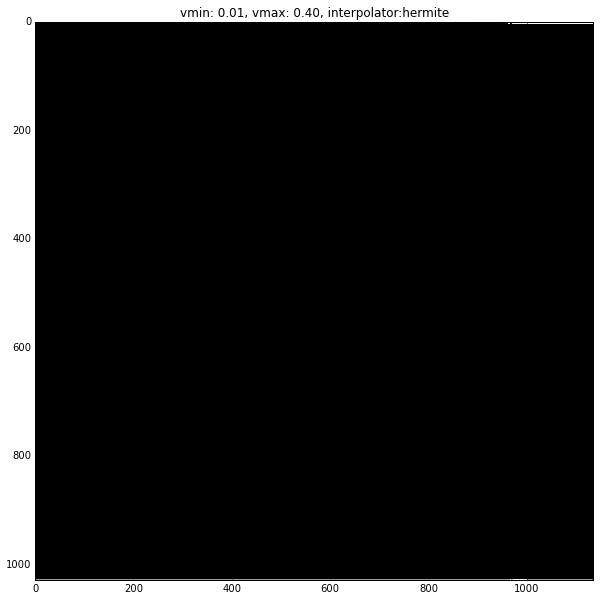

In [98]:
interact(myimshow, img=fixed(subtracted), vmin=(0.0, 0.01, 0.001),
         vmax=(0.4, 0.6, 0.001), i=(0, len(interpolators)-1));

In [96]:
np.nanmin(subtracted)

-0.0079247952

In [97]:
np.nanmax(subtracted)

0.052165519

In [99]:
from skimage.exposure import equalize_hist

In [104]:
eq = equalize_hist(eq)

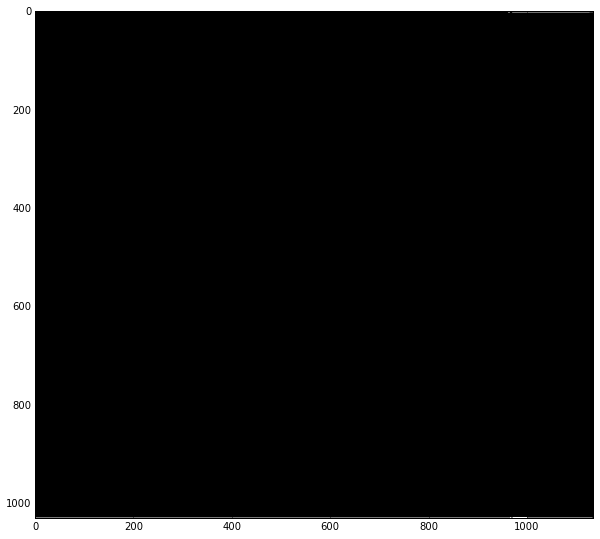

In [102]:
plt.imshow(eq)

In [107]:
np.histogram(subtracted, bins=100)

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        5765]),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  n